# Problem statement 9:
## 1. Implement naive bayes classification algorithm using Python /R to perform classification on a given dataset.
## 2. Compute Confusion Matrix of findTP,FP,TN,FN,Accuracy, Error Rate, Precision,Recall on the given dataset
### Importing libraries

In [32]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

### Read dataset

In [33]:
#reading the dataset
df = pd.read_csv("/Users/abhimsound/Desktop/DSBDA FINAL/A9/Iris.csv")

In [17]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [18]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [34]:
print("Shape: ", df.shape)
df.isnull().sum()

Shape:  (150, 6)


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df.drop('Id', axis=1, inplace=True)

In [40]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Species'])
label

df.drop('Species', axis = 1, inplace = True)
df['Species'] = label

In [42]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

<Axes: xlabel='Species', ylabel='Count'>

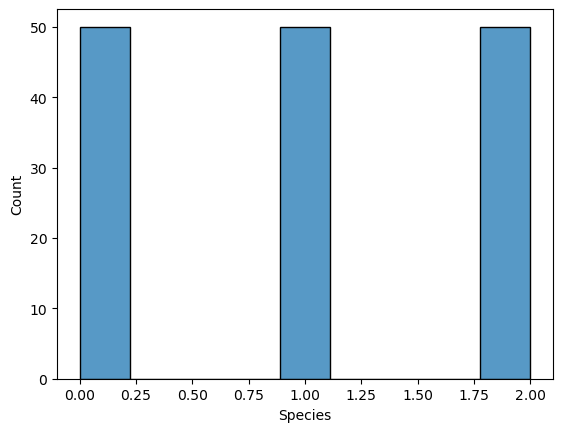

In [44]:
sns.histplot(df['Species'])

In [45]:

df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]

In [48]:

from sklearn.model_selection import train_test_split
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

X = df[features]
y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [49]:
Y_traind = pd.DataFrame(y_train)
Y_traind['Species'].value_counts()

2    41
0    37
1    34
Name: Species, dtype: int64

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_test
# X_train = pd.DataFrame()

array([[-0.03642412,  2.3654605 , -1.46560477, -1.3069008 ],
       [-0.8763215 , -1.25712258, -0.44921013, -0.139032  ],
       [ 0.92345859, -0.04959489,  0.34131903,  0.2502576 ],
       [-0.51636548,  2.12395496, -1.4091384 , -1.0473744 ],
       [ 2.48326801,  1.88244942,  1.47064641,  1.0288368 ],
       [ 0.56350258,  0.67492173,  0.51071814,  0.509784  ],
       [ 1.28341461,  0.19191065,  0.73658362,  1.4181264 ],
       [-0.8763215 ,  1.88244942, -1.07034019, -1.0473744 ],
       [-1.35626285,  0.43341619, -1.2397393 , -1.3069008 ],
       [ 1.28341461,  0.43341619,  1.07538183,  1.4181264 ],
       [-0.2763948 , -0.7741115 ,  0.2283863 ,  0.1204944 ],
       [-0.51636548,  2.12395496, -1.18327293, -1.0473744 ],
       [ 1.52338529, -0.04959489,  1.18831457,  1.1586    ],
       [ 0.68348792,  0.43341619,  0.3977854 ,  0.3800208 ],
       [ 0.20354656, -0.29110043,  0.3977854 ,  0.3800208 ],
       [-1.71621887,  0.43341619, -1.4091384 , -1.3069008 ],
       [-0.03642412, -1.

In [51]:

from sklearn.naive_bayes import GaussianNB

log_reg = GaussianNB()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
    

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [53]:

from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy: ", acc)
print("F1 Score: ", f1)

Accuracy:  0.9736842105263158
F1 Score:  0.9736842105263158


### Split Dataset

In [56]:
#splitting the data into train=70% and test=30%
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.3,random_state=0)

print(X_train[:3])
print('-'*15)
print(Y_train[:3])
print('-'*15)
print(X_test[:3])
print('-'*15)
print(Y_test[:3])

NameError: name 'Y_test' is not defined

In [55]:
#converting species to categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

NameError: name 'Y' is not defined

### Data preprocessing

In [23]:
#data preprocessing
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train[:3])
print('-'*15)
print(X_test[:3])

NameError: name 'X_train' is not defined

### Gaussian Naive Bayer's Classifier

In [24]:
#applying gaussian naive bayer's classifier
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test) 

print(X_test[:10])
print('-'*15)
print(Y_pred[:10])

NameError: name 'X_train' is not defined

In [25]:
#observe y_test and y_predict
print(Y_pred[:20])
print(Y_test[:20])

NameError: name 'Y_pred' is not defined

### Confusion Matrix

In [26]:
#computing the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

NameError: name 'Y_test' is not defined

In [27]:
#calculating accuracy
accuracy = accuracy_score(Y_test,Y_pred)
print('accuracy_Naive Bayes: %.3f' %accuracy)

NameError: name 'Y_test' is not defined

In [28]:
#calculating precision
precision =precision_score(Y_test, Y_pred,average='micro')
print('precision_Naive Bayes: %.3f' %precision)

NameError: name 'Y_test' is not defined

In [29]:
#calculating recall
recall =  recall_score(Y_test, Y_pred,average='micro')
print('recall_Naive Bayes: %.3f' %recall)

NameError: name 'Y_test' is not defined

In [30]:
#calculating error rate
error_rate=1-accuracy
print('error_rate_Naive Bayes: %.3f' %error_rate)

NameError: name 'accuracy' is not defined

In [31]:
#calculating tp,tn,fp,fn
#TP: The actual value and predicted value should be the same. So concerning Setosa class, the value of cell 1 is the TP value.
#FN: The sum of values of corresponding rows except for the TP value
#FP: The sum of values of the corresponding column except for the TP value.
#TN: The sum of values of all columns and rows except the values of that class that we are calculating the values for.

##Setosa
print("Setosa:")
print("TP: ", cm[0][0]) 
print("FN: ", cm[0][1]+cm[0][2]) 
print("FP:", cm[1][0]+cm[2][0]) 
print("TN:", cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]) 

##Versicolor
print("Versicolor:")
print("TP: ", cm[1][1]) 
print("FN: ", cm[1][0]+cm[1][2]) 
print("FP:", cm[0][1]+cm[2][1]) 
print("TN:", cm[0][0]+cm[0][2]+cm[2][0]+cm[2][2]) 


##Virginica
print("Verginica:")
print("TP: ", cm[2][2]) 
print("FN: ", cm[2][0]+cm[2][1]) 
print("FP:", cm[0][2]+cm[1][2]) 
print("TN:", cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]) 

Setosa:


NameError: name 'cm' is not defined